In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\amare\Downloads\House Rental.csv')
# Display first few rows to inspect data
print(df.shape)

(99492, 22)


C:\Users\amare\AppData\Local\Temp\ipykernel_28428\3068778750.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\amare\Downloads\House Rental.csv')


In [3]:
df.columns

Index(['listing_id', 'listing_category', 'headline', 'description',
       'included_features', 'bath_count', 'bed_count', 'payment_currency',
       'service_fee_applicable', 'image_available', 'pet_policy',
       'monthly_rent', 'formatted_rent_text', 'payment_schedule',
       'area_in_sqft', 'street_address', 'city', 'region_code', 'geo_lat',
       'geo_lon', 'data_provider', 'listing_timestamp'],
      dtype='object')

In [5]:
print(df.dtypes)
print(df.head())

listing_id                  int64
listing_category           object
headline                   object
description                object
included_features          object
bath_count                float64
bed_count                 float64
payment_currency           object
service_fee_applicable     object
image_available            object
pet_policy                 object
monthly_rent              float64
formatted_rent_text        object
payment_schedule           object
area_in_sqft                int64
street_address             object
city                       object
region_code                object
geo_lat                   float64
geo_lon                   float64
data_provider              object
listing_timestamp           int64
dtype: object
   listing_id        listing_category                         headline  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  h

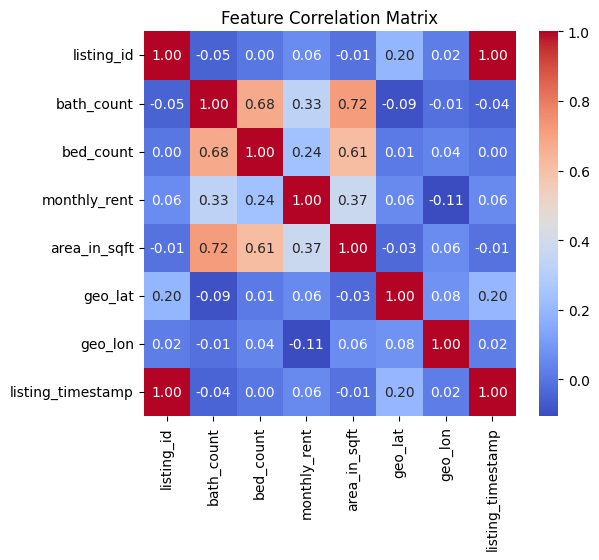

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only select numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

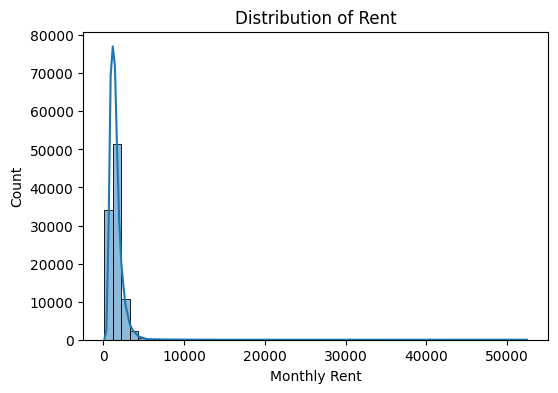

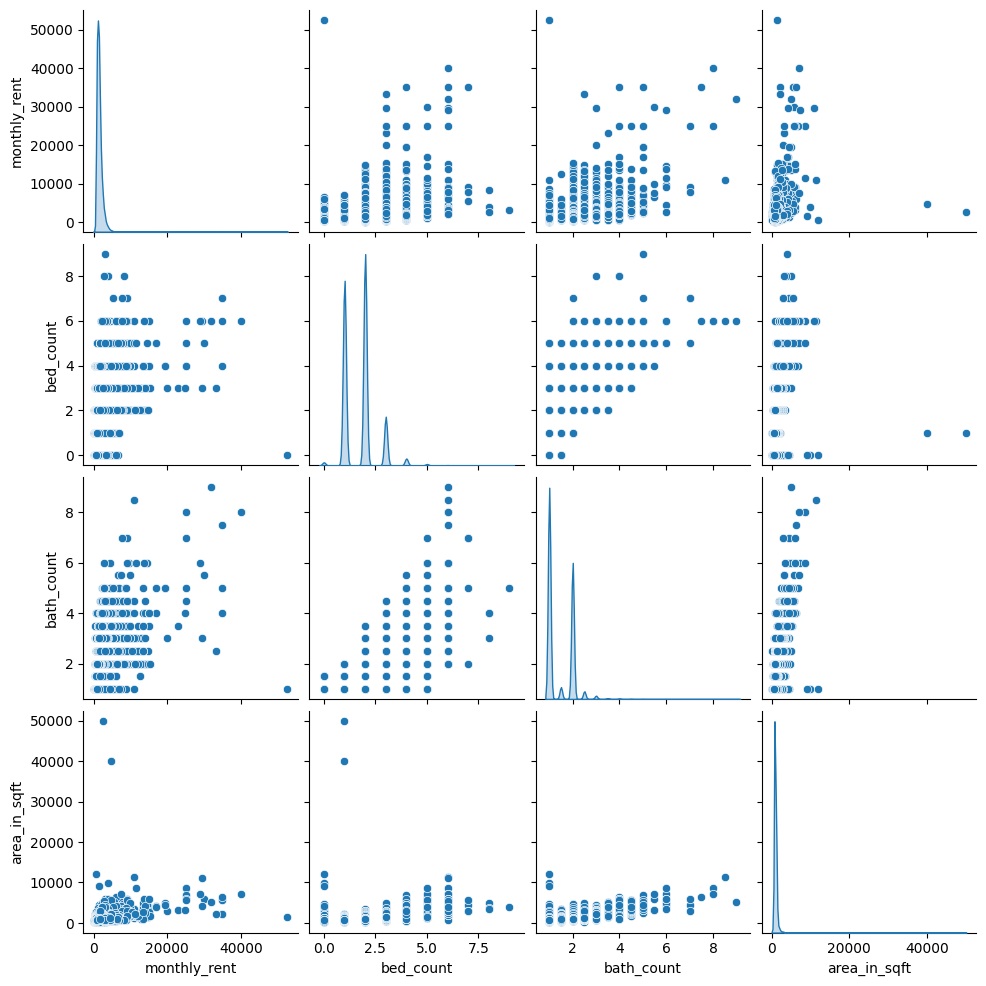

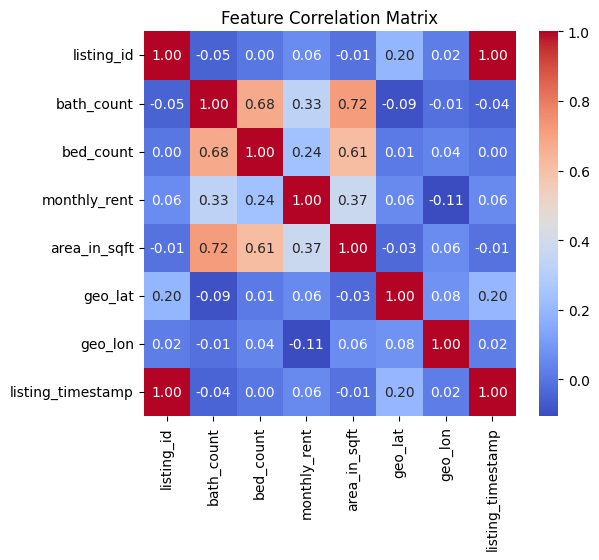

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of the target variable (Rent)
plt.figure(figsize=(6,4))
sns.histplot(df['monthly_rent'], bins=50, kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Monthly Rent')
plt.ylabel('Count')
plt.show()

# Example: Pairplot of a few numeric features (if not too many features)
sns.pairplot(df[['monthly_rent', 'bed_count', 'bath_count', 'area_in_sqft']], diag_kind='kde')
plt.show()

# Only select numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [9]:
# Check for missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Strategy: Drop rows where essential columns are missing; then impute remaining missing values
# Verify column names
print("Columns in dataset:", df.columns.tolist())
# Drop rows where target or key numeric features are missing
df = df.dropna(subset=['monthly_rent', 'area_in_sqft', 'bed_count', 'bath_count'])

# Impute numeric missing values with the median
num_cols = df.select_dtypes(include='number').columns.tolist()
for col in num_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Impute categorical missing values with the mode
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:", df.isnull().sum())
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

Missing values per column:
 listing_id                    0
listing_category              0
headline                      0
description                   3
included_features         16044
bath_count                   63
bed_count                   124
payment_currency              0
service_fee_applicable        0
image_available               0
pet_policy                60424
monthly_rent                  1
formatted_rent_text           1
payment_schedule              0
area_in_sqft                  0
street_address            91549
city                        302
region_code                 302
geo_lat                      25
geo_lon                      25
data_provider                 0
listing_timestamp             0
dtype: int64
Columns in dataset: ['listing_id', 'listing_category', 'headline', 'description', 'included_features', 'bath_count', 'bed_count', 'payment_currency', 'service_fee_applicable', 'image_available', 'pet_policy', 'monthly_rent', 'formatted_rent_text', 'paymen

C:\Users\amare\AppData\Local\Temp\ipykernel_28428\709441496.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\amare\AppData\Local\Temp\ipykernel_28428\709441496.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Missing values after imputation: listing_id                0
listing_category          0
headline                  0
description               0
included_features         0
bath_count                0
bed_count                 0
payment_currency          0
service_fee_applicable    0
image_available           0
pet_policy                0
monthly_rent              0
formatted_rent_text       0
payment_schedule          0
area_in_sqft              0
street_address            0
city                      0
region_code               0
geo_lat                   0
geo_lon                   0
data_provider             0
listing_timestamp         0
dtype: int64


C:\Users\amare\AppData\Local\Temp\ipykernel_28428\709441496.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
# 1. Identify object-type columns
df_cols = df.columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns before processing:", cat_cols)

# 2. Drop free-text columns not used
text_cols = ['headline', 'description', 'street_address', 'formatted_rent_text']
df.drop(columns=[c for c in text_cols if c in df_cols], inplace=True)

# 3. Handle simple nominal columns by grouping rare categories (<5%) into 'Other'
to_group = ['listing_category', 'payment_currency', 'payment_schedule',
            'data_provider', 'pet_policy', 'city', 'region_code']
for col in to_group:
    if col in df.columns:
        freq = df[col].value_counts(normalize=True)
        common = freq[freq >= 0.05].index
        df.loc[:, col] = df[col].where(df[col].isin(common), 'Other')

# 4. One-hot encode the cleaned nominal columns
encode_cols = ['listing_category', 'payment_currency', 'service_fee_applicable',
               'image_available', 'payment_schedule', 'data_provider', 'pet_policy',
               'city', 'region_code']
df = pd.get_dummies(df, columns=[c for c in encode_cols if c in df.columns], drop_first=True)

# 5. Multi-label features: limit to top 20 'included_features'
if 'included_features' in df.columns:
    df['included_features_list'] = df['included_features'].str.split(',').apply(
        lambda lst: [s.strip() for s in lst] if isinstance(lst, list) else [])
    top_feats = df['included_features_list'].explode().value_counts().head(20).index
    for feat in top_feats:
        df[f'feat_{feat}'] = df['included_features_list'].apply(lambda lst: int(feat in lst))
    df.drop(columns=['included_features', 'included_features_list'], inplace=True)

# 6. Verify no object columns remain
remaining = df.select_dtypes(include=['object']).columns.tolist()
print("Remaining object columns (should be empty):", remaining)

Categorical columns before processing: ['listing_category', 'headline', 'description', 'included_features', 'payment_currency', 'service_fee_applicable', 'image_available', 'pet_policy', 'formatted_rent_text', 'payment_schedule', 'street_address', 'city', 'region_code', 'data_provider']
Remaining object columns (should be empty): []


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numeric columns (excluding the target 'Rent')
features = df.drop('monthly_rent', axis=1)
numeric_cols = features.select_dtypes(include='number').columns

# Standardize features: mean=0, std=1
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Optionally, we could use MinMaxScaler to scale between [0,1]:
mms = MinMaxScaler()
df[numeric_cols] = mms.fit_transform(df[numeric_cols])

In [13]:
import numpy as np

# Example: Use IQR method for a numeric feature, say 'Rent'
Q1 = df['monthly_rent'].quantile(0.25)
Q3 = df['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'Rent'
outliers = df[(df['monthly_rent'] < lower_bound) | (df['monthly_rent'] > upper_bound)]
print(f"Detected {len(outliers)} outliers in Rent")

# Treatment: We can remove or cap them. Here, we remove for simplicity.
df = df[(df['monthly_rent'] >= lower_bound) & (df['monthly_rent'] <= upper_bound)]

Detected 4692 outliers in Rent


In [14]:
# Example Feature Selection: Remove features with low variance (near-constant)
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.01)  # remove very low variance features
df_reduced = sel.fit_transform(df.drop('monthly_rent', axis=1))
selected_cols = df.drop('monthly_rent', axis=1).columns[sel.get_support()]
print("Selected features:", list(selected_cols))

# Example Feature Extraction: PCA to reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # choose number of components
principal_components = pca.fit_transform(df.drop('monthly_rent', axis=1))
print(f"Explained variance by 5 PCs: {np.sum(pca.explained_variance_ratio_):.2f}")

Selected features: ['listing_id', 'geo_lat', 'geo_lon', 'listing_timestamp', 'image_available_Thumbnail', 'image_available_Yes', 'data_provider_RentDigs.com', 'data_provider_RentLingo', 'pet_policy_Other', 'region_code_CO', 'region_code_FL', 'region_code_MA', 'region_code_MD', 'region_code_NC', 'region_code_Other', 'region_code_TX', 'region_code_VA', 'feat_Parking', 'feat_Pool', 'feat_Gym', 'feat_Patio/Deck', 'feat_Washer Dryer', 'feat_Storage', 'feat_Clubhouse', 'feat_Dishwasher', 'feat_AC', 'feat_Fireplace', 'feat_Refrigerator', 'feat_Cable or Satellite', 'feat_Playground', 'feat_Internet Access', 'feat_Wood Floors', 'feat_Gated', 'feat_Tennis', 'feat_TV', 'feat_Elevator', 'feat_Basketball']
Explained variance by 5 PCs: 0.46


In [17]:
print("Median monthly_rent:", df['monthly_rent'].median())

Median monthly_rent: 1321.0


In [23]:
# For classification, define target: create 'HighRent' flag if monthly_rent is above the median
median_rent = df['monthly_rent'].median()
# Use .loc to avoid SettingWithCopyWarning
[df] = [df]
df.loc[:, 'HighRent'] = (df['monthly_rent'] > median_rent).astype(int)

# Check class distribution
print(df['HighRent'].value_counts())

# If imbalanced, one can use resampling. Example: SMOTE (requires imblearn library)
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=0)
# X_res, y_res = sm.fit_resample(df.drop(['Rent','HighRent'], axis=1), df['HighRent'])

HighRent
0    47312
1    47301
Name: count, dtype: int64


In [25]:
# Ensure df is a fresh copy to avoid SettingWithCopyWarning on chained assignments
df = df.copy()

# Example: Log-transform the 'monthly_rent' target for regression if it is skewed
# Use .loc for safe assignment
df.loc[:, 'log_monthly_rent'] = np.log1p(df['monthly_rent'])  # log(1 + monthly_rent)

# Alternatively, apply Box-Cox (for positive data only)
# from scipy.stats import boxcox
# df['monthly_rent_boxcox'], fitted_lambda = boxcox(df['monthly_rent'] + 1)

# Check skew after transformation (for illustration)
print("Skewness before log:", df['monthly_rent'].skew().round(2))
print("Skewness after log:", df['log_monthly_rent'].skew().round(2))


Skewness before log: 0.71
Skewness after log: -0.15


In [27]:
from sklearn.model_selection import train_test_split

# For classification (target = HighRent)
X = df.drop(['monthly_rent','log_monthly_rent','HighRent'], axis=1)
y = df['HighRent']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# For regression (target = Rent)
X = df.drop(['monthly_rent','log_monthly_rent','HighRent'], axis=1)
y = df['monthly_rent']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_clf = logreg.predict(X_test_clf)

# Evaluate classification performance
acc = accuracy_score(y_test_clf, y_pred_clf)
prec = precision_score(y_test_clf, y_pred_clf)
rec = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

print("Logistic Regression Metrics:")
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-Score: {f1:.3f}")

Logistic Regression Metrics:
Accuracy: 0.758, Precision: 0.772, Recall: 0.733, F1-Score: 0.752


In [30]:
# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[7420 2043]
 [2527 6933]]


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test_clf)
acc_rf = accuracy_score(y_test_clf, y_pred_rf)
prec_rf = precision_score(y_test_clf, y_pred_rf)
rec_rf = recall_score(y_test_clf, y_pred_rf)
f1_rf = f1_score(y_test_clf, y_pred_rf)

print("Random Forest (Classifier) Metrics:")
print(f"Accuracy: {acc_rf:.3f}, Precision: {prec_rf:.3f}, Recall: {rec_rf:.3f}, F1-Score: {f1_rf:.3f}")

Random Forest (Classifier) Metrics:
Accuracy: 0.912, Precision: 0.916, Recall: 0.908, F1-Score: 0.912


In [34]:
import xgboost as xgb
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train_clf, y_train_clf)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train linear regression
linreg = LinearRegression()
linreg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = linreg.predict(X_test_reg)
rmse_lin = mean_squared_error(y_test_reg, y_pred_reg, squared=False)  # RMSE

print("Linear Regression RMSE:", rmse_lin)

Linear Regression RMSE: 393.77927892591737


C:\Users\amare\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_rf_reg = rf_reg.predict(X_test_reg)
rmse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg, squared=False)

print("Random Forest (Regressor) RMSE:", rmse_rf)

Random Forest (Regressor) RMSE: 200.76346801044278


C:\Users\amare\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Train XGBoost regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)
rmse_xgb = mean_squared_error(y_test_reg, y_pred_xgb_reg, squared=False)

print("XGBoost (Regressor) RMSE:", rmse_xgb)

XGBoost (Regressor) RMSE: 255.66937366845931


C:\Users\amare\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Regression evaluation
models_reg = {'LinearRegression': linreg, 'Random Forest': rf_reg, 'XGBoost': xgb_reg}
for name, model in models_reg.items():
    preds = model.predict(X_test_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg, preds))
    mae = mean_absolute_error(y_test_reg, preds)
    print(f"{name} Regressor -> RMSE: {rmse:.2f}, MAE: {mae:.2f}")

LinearRegression Regressor -> RMSE: 393.78, MAE: 301.32
Random Forest Regressor -> RMSE: 200.76, MAE: 130.11
XGBoost Regressor -> RMSE: 255.67, MAE: 188.03


In [39]:
# ...existing code...
from sklearn.metrics import classification_report

# Define class labels for the classification report
rent_labels = ['LowRent', 'HighRent']

# Classification evaluation
models_clf = {'Logistic Regression': logreg, 'Random Forest': rf_clf, 'XGBoost': xgb_clf}
for name, model in models_clf.items():
    preds = model.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, preds)
    prec = precision_score(y_test_clf, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test_clf, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test_clf, preds, average='weighted', zero_division=0)
    print(f"{name} Classifier -> Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")
    # Confusion matrix
    cm = confusion_matrix(y_test_clf, preds)
    print(f"Confusion Matrix for {name}:\n{cm}")
    # Optional: classification report
    print(classification_report(y_test_clf, preds, target_names=rent_labels))
# ...existing code...

Logistic Regression Classifier -> Accuracy: 0.758, Precision: 0.759, Recall: 0.758, F1: 0.758
Confusion Matrix for Logistic Regression:
[[7420 2043]
 [2527 6933]]
              precision    recall  f1-score   support

     LowRent       0.75      0.78      0.76      9463
    HighRent       0.77      0.73      0.75      9460

    accuracy                           0.76     18923
   macro avg       0.76      0.76      0.76     18923
weighted avg       0.76      0.76      0.76     18923

Random Forest Classifier -> Accuracy: 0.912, Precision: 0.912, Recall: 0.912, F1: 0.912
Confusion Matrix for Random Forest:
[[8671  792]
 [ 872 8588]]
              precision    recall  f1-score   support

     LowRent       0.91      0.92      0.91      9463
    HighRent       0.92      0.91      0.91      9460

    accuracy                           0.91     18923
   macro avg       0.91      0.91      0.91     18923
weighted avg       0.91      0.91      0.91     18923

XGBoost Classifier -> Accuracy: 

In [40]:
# Save the cleaned and preprocessed dataset (including any prediction columns) to res.csv
df.to_csv('res.csv', index=False)
print("Saved the final dataset to res.csv")

Saved the final dataset to res.csv


In [41]:
import os
print(os.getcwd())
print(os.listdir())

D:\gradious intern\project
['.ipynb_checkpoints', 'anaconda_projects', 'House_Rental_Classified.ipynb', 'Jithu.ipynb', 'project_hrc.ipynb', 'Project_planb', 'Rental Analysis.ipynb', 'res.csv', 'Untitled.ipynb', 'x.ipynb', '☠️☠️']
